In [34]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 
from cloudmesh.common.systeminfo import systeminfo
import ipywidgets as widgets
from collections import OrderedDict

sns.set_theme(style="whitegrid")

In [35]:
data = OrderedDict()

In [36]:
for user, node, processors in [("gregor", "alienware", 4), 
                              ("gregor", "alienware", 8),
                              ("gregor", "alienware", 16),
                              ("gregor", "alienware", 32)]:

    label = f"{user}-{node}-{processors}"
    output = f"benchmark/{user}"

    df = pd.read_pickle(f"{output}/{label}-df.pkl")
    display(df)
    row = list(df.iloc[[-1]].values[0])
    print (processors, row)
    data[str(processors)] = row

Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
16,0.008,0.008,0.036,0.028,0.001,0.020,0.042,0.017,0.010,0.009
2560000,2.069,2.143,2.131,2.101,2.106,2.098,2.179,2.107,2.139,2.116
5120000,4.205,4.207,4.133,4.227,4.215,4.183,4.154,4.150,4.252,4.239
7680000,6.362,6.367,6.345,6.511,6.311,6.245,6.411,6.770,6.340,6.275
10240000,8.411,8.691,8.406,8.500,8.417,8.385,8.384,8.339,8.351,8.208
12800000,10.516,10.313,10.358,10.601,10.418,10.536,10.424,10.263,10.411,10.459
15360000,12.647,12.462,12.663,12.502,12.561,12.322,12.556,12.310,12.586,12.710
17920000,14.561,15.117,14.833,15.110,14.857,14.557,14.604,14.513,14.556,15.009
20480000,16.456,16.696,16.579,16.786,16.625,16.599,16.835,17.289,16.516,17.200


4 [18.678, 18.826, 18.714, 18.814, 19.048, 18.62, 18.57, 19.048, 18.925, 18.748]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
8,0.039,0.000,0.035,0.003,0.018,0.045,0.044,0.055,0.043,0.010
1280000,1.091,1.087,1.075,1.115,1.125,1.085,1.104,1.119,1.064,1.094
2560000,2.231,2.061,2.200,2.193,2.135,2.136,2.246,2.092,2.164,2.115
3840000,3.176,3.133,3.172,3.161,3.139,3.201,3.188,3.232,3.210,3.242
5120000,4.186,4.331,4.277,4.167,4.216,4.338,4.205,4.150,4.250,4.267
6400000,5.312,5.422,5.340,5.281,5.363,5.353,5.349,5.271,5.439,5.326
7680000,6.294,6.324,6.351,6.585,6.304,6.288,6.328,6.538,6.462,6.308
8960000,7.375,7.330,7.422,7.471,7.391,7.688,7.352,7.417,7.364,7.391
10240000,8.418,8.300,8.298,8.440,8.355,8.808,8.573,8.450,8.472,8.506


8 [9.397, 9.416, 9.745, 9.589, 9.481, 9.716, 9.69, 9.591, 9.597, 9.564]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
4,0.024,0.000,0.045,0.047,0.072,0.009,0.003,0.011,0.003,0.096
640000,0.860,0.692,0.899,0.885,0.846,0.925,0.855,0.918,0.856,0.851
1280000,1.698,1.714,1.746,1.453,1.800,1.732,1.799,1.694,1.710,1.673
1920000,2.586,2.661,3.656,2.669,2.563,2.601,2.642,2.584,2.624,2.656
2560000,3.433,3.434,3.073,3.469,2.607,3.490,3.400,3.363,3.379,2.683
3200000,4.287,4.266,4.578,3.643,4.401,4.276,4.327,4.300,4.200,4.265
3840000,5.141,5.217,5.098,5.241,5.294,5.194,5.166,4.720,5.149,5.190
4480000,5.979,5.932,6.100,6.001,4.901,5.809,6.091,6.025,6.000,6.174
5120000,5.340,6.940,7.042,5.944,6.827,6.804,6.941,5.832,7.255,6.867


16 [7.726, 7.681, 6.714, 7.845, 7.825, 7.787, 7.775, 7.862, 7.711, 7.65]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
2,0.117,0.192,0.097,0.094,0.124,0.114,0.141,0.072,0.087,0.020
320000,0.743,0.611,0.595,0.687,0.474,0.586,0.618,0.648,0.733,0.724
640000,1.086,1.177,1.261,1.032,0.938,1.182,1.158,1.162,1.244,1.148
960000,1.784,1.666,1.532,1.641,1.959,1.553,1.655,1.719,1.606,1.622
1280000,2.197,2.338,1.930,2.400,2.090,2.054,2.087,2.137,2.097,2.072
1600000,2.566,2.697,2.690,2.274,2.527,3.447,2.499,2.573,2.534,2.686
1920000,2.974,2.954,2.810,2.766,3.240,3.035,3.136,3.033,3.090,2.992
2240000,3.526,3.484,3.294,3.333,3.631,3.560,3.585,3.434,3.497,3.503
2560000,4.070,4.229,3.817,3.733,4.143,3.982,4.323,3.979,4.073,4.037


32 [4.362, 4.581, 4.276, 4.353, 4.578, 4.625, 4.516, 4.396, 4.532, 4.52]


In [37]:
result = pd.DataFrame(data)
result.index.name = "Trial"
result

,4,8,16,32
Trial,,,,
0,18.678,9.397,7.726,4.362
1,18.826,9.416,7.681,4.581
2,18.714,9.745,6.714,4.276
3,18.814,9.589,7.845,4.353
4,19.048,9.481,7.825,4.578
5,18.620,9.716,7.787,4.625
6,18.570,9.690,7.775,4.516
7,19.048,9.591,7.862,4.396
8,18.925,9.597,7.711,4.532


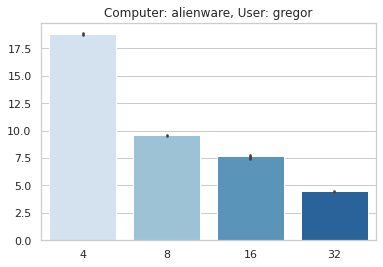

In [56]:
#sns.boxplot(data=result);
#sns.swarmplot(data=result);
sns.barplot(data=result, palette="Blues").set_title(f'Computer: {node}, User: {user}');



In [57]:
result.describe()

,4,8,16,32
count,10.000000,10.000000,10.000000,10.000000
mean,18.799100,9.578600,7.657600,4.473900
std,0.166594,0.119599,0.338947,0.117749
min,18.570000,9.397000,6.714000,4.276000
25%,18.687000,9.501750,7.688500,4.370500
50%,18.781000,9.590000,7.750500,4.518000
75%,18.900250,9.666750,7.815500,4.566500
max,19.048000,9.745000,7.862000,4.625000


In [58]:
df_line = pd.DataFrame({
    "Processors": list(result.columns),
    "Time in s": list(result.describe(include='all').loc['mean'])           
                 })
df_line["Processors"] = pd.to_numeric(df_line["Processors"])


In [61]:
df_line["Sum"] = df_line["Time in s"] * df_line["Processors"]
df_line

,Processors,Time in s,Efficiency,Sum
0,4,18.7991,4.699775,75.1964
1,8,9.5786,1.197325,76.6288
2,16,7.6576,0.478600,122.5216
3,32,4.4739,0.139809,143.1648


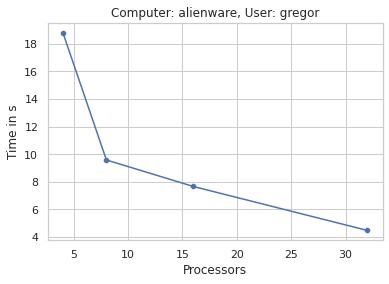

In [60]:
sns.scatterplot(data=df_line, x="Processors", y="Time in s");
sns.lineplot(data=df_line, x="Processors", y="Time in s").set_title(f'Computer: {node}, User: {user}');